In [28]:
#check the gpu
!nvidia-smi

Mon Jul 19 06:27:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |   4826MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Creating Helper Functions

It is good idea to put them into github and import them when you need

In [29]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-19 06:27:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-19 06:27:16 (106 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [30]:
#import helper functions 
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir


##Get the data

use the pre trained models within tf.keras.applications and apply them to our problems.

In [31]:
#get traning data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-07-19 06:27:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c05::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   236MB/s    in 0.7s    

2021-07-19 06:27:17 (236 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [32]:
#check out dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [33]:
#create training and test directories
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [34]:
import tensorflow as tf

In [35]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent =tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode="categorical",
                                                              batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [36]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [37]:
#checkout clssnames
train_data_10_percent.class_names


['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [38]:
#see a example of batch
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[5.34183645e+00 5.34183645e+00 0.00000000e+00]
   [5.99999952e+00 4.99999952e+00 6.88775301e-01]
   [7.95918465e-01 7.95918465e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[4.26530600e+00 3.26530600e+00 1.93877459e-01]
   [1.42856598e-01 1.14285660e+00 0.00000000e+00]
   [2.64285731e+00 1.42857170e+00 2.29591981e-01]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[9.06122494e+00 8.84693909e+00 6.41836786e+00]
   [9.84693229e-01 4.13264453e-01 5.61222434e-02]
   [5.42857170e+00 1.26020420e+00 9.18367505e-02]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  ...

  [[9.39285736e+01 8.19285736e+01 8.59285736e+01]
   [9

##Create a transfer learning model using fucntional API

In [39]:
#create base model with tf.keras.applications
base_model =tf.keras.applications.EfficientNetB0(include_top=False)

#freeze the base model
base_model.trainbale=False

#create inputs into model
inputs =tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# #if using resnet50 you will need to normalzied inputs
# x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#pass the inputs into base model
x=base_model(inputs)
print(f"Shape after passing inputs though base model :{x.shape}")

#avarage pool the outputs of the model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_avarage_poolong_layer")(x)
print(f"Shspe after GlobalAvaragePoolong :{x.shape}")

#create the output activation layer
outputs =tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#combine inputs outputs 
model_0 =tf.keras.Model(inputs,outputs)

#compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_10_percent =model_0.fit(train_data_10_percent,
            epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=int(0.25 *len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name ="10_percent_feature_extraction"
                                                   )])


Shape after passing inputs though base model :(None, 7, 7, 1280)
Shspe after GlobalAvaragePoolong :(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210719-062722
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 21s 571ms/step - loss: 1.4187 - accuracy: 0.5453 - val_loss: 1.3345 - val_accuracy: 0.6234
Epoch 2/5
24/24 [==============================] - 11s 458ms/step - loss: 0.2843 - accuracy: 0.9187 - val_loss: 0.9353 - val_accuracy: 0.7401
Epoch 3/5
24/24 [==============================] - 11s 450ms/step - loss: 0.0840 - accuracy: 0.9773 - val_loss: 0.8344 - val_accuracy: 0.7829
Epoch 4/5
24/24 [==============================] - 11s 436ms/step - loss: 0.0678 - accuracy: 0.9787 - val_loss: 0.7531 - val_accuracy: 0.7796
Epoch 5/5
24/24 [==============================] - 11s 444ms/step - loss: 0.0579 - accuracy: 0.9867 - val_loss: 0.9079 - val_accuracy: 0.7697


In [40]:
#evalaut the model
model_0.evaluate(test_data)

79/79 [==============================] - 9s 109ms/step - loss: 0.9207 - accuracy: 0.7692


[0.9206995368003845, 0.7692000269889832]

In [41]:
#check the layers in base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)


0 input_2
1 rescaling_1
2 normalization_1
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [42]:
#summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, None, None, 3 7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_1[0][0]            
_____________________________________________________________________________________

In [43]:
#whole model
model_0.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avarage_poolong_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 4,020,358
Non-trainable params: 42,023
_________________________________________________________________


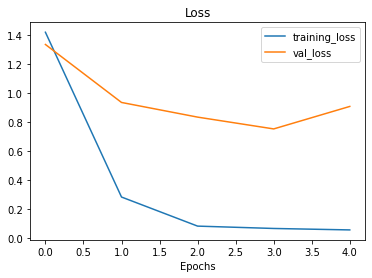

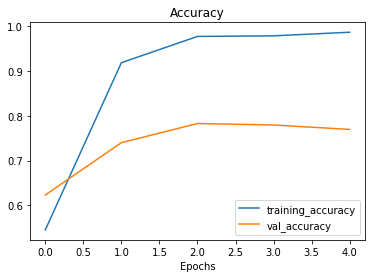

In [44]:
#check out the loss curver
plot_loss_curves(history_10_percent)

##Getting a Feature Vector from Trained Model

In [45]:
#define the input shape
input_shape= (1,4,4,3)

#create random tensor
input_tensor=tf.random.normal(input_shape)
print(f"Random input Tensor :\n {input_tensor} \n ")

#pass the random tensor thought global avarage pooling 2d layer
global_avarage_pooled_tensor =tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D Global Avarage Pooled Random Tensor :\n{global_avarage_pooled_tensor}\n ")

Random input Tensor :
 [[[[ 1.0154773   0.20757852  0.6120216 ]
   [-0.36584407  0.84116256 -1.0083352 ]
   [-0.46733722  1.8438435   2.050152  ]
   [-0.4406769   1.679871   -0.9238025 ]]

  [[-0.57592684  0.79027647  2.3139749 ]
   [-0.5891213   0.57300895 -0.5451418 ]
   [-1.5163782   0.15674703  0.67500454]
   [-0.31260726 -0.90233153 -0.08104824]]

  [[ 1.5595161   1.1811821  -0.4665957 ]
   [ 1.0752513   1.3060395   0.87090564]
   [-0.6458563   2.1670103  -0.4745062 ]
   [ 0.42526737 -0.68961746 -2.3119547 ]]

  [[ 1.1225429  -1.2696333  -0.46351847]
   [-0.49227133 -0.11140464 -0.4477447 ]
   [-1.1860839   0.6864608   1.2104872 ]
   [-0.7671843   0.36264133 -1.710057  ]]]] 
 
2D Global Avarage Pooled Random Tensor :
[[-0.13507703  0.5514272  -0.04375988]]
 


In [46]:
#check the shape
print(f"shape of the input tensor : {input_tensor.shape}")
print(f"shape of the global avarage pooled 2d tensor : {global_avarage_pooled_tensor.shape}")

shape of the input tensor : (1, 4, 4, 3)
shape of the global avarage pooled 2d tensor : (1, 3)


In [47]:
#replicate the global avarage pool 2d
tf.reduce_mean(input_tensor,axis=[1,2])


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.13507703,  0.5514272 , -0.04375988]], dtype=float32)>

##Running a series of tranfer leraning experiments



In [51]:
#Downlaod and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2021-07-19 06:31:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   185MB/s    in 0.7s    

2021-07-19 06:31:08 (185 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [52]:
#craete test and train
train_dir_1_percent="10_food_classes_1_percent/train"
test_dir_1_percent="10_food_classes_1_percent/test"


##Preprocess data

In [53]:
#check for the images
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'

In [54]:
#setup data loaders
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_1_percent =tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE,
                                                                          batch_size=BATCH_SIZE)

test_data_1_percent =tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE,
                                                                          batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
